# Assignment: 5

- Apply clustering algorithms to identify profitable customer groups based on spending behavior.
- Visualize the clusters using appropriate techniques.
- Analyze clustering effectiveness using appropriate metrics.
- **Dataset Used:** Mall Customers Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load Dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Check for missing values
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# Using 'Annual Income' and 'Spending Score' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

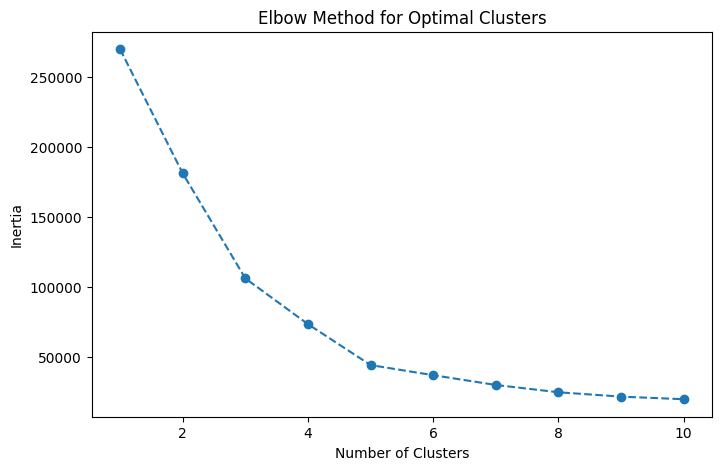

In [14]:
# Finding optimal clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [15]:
# Applying K-Means with optimal clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


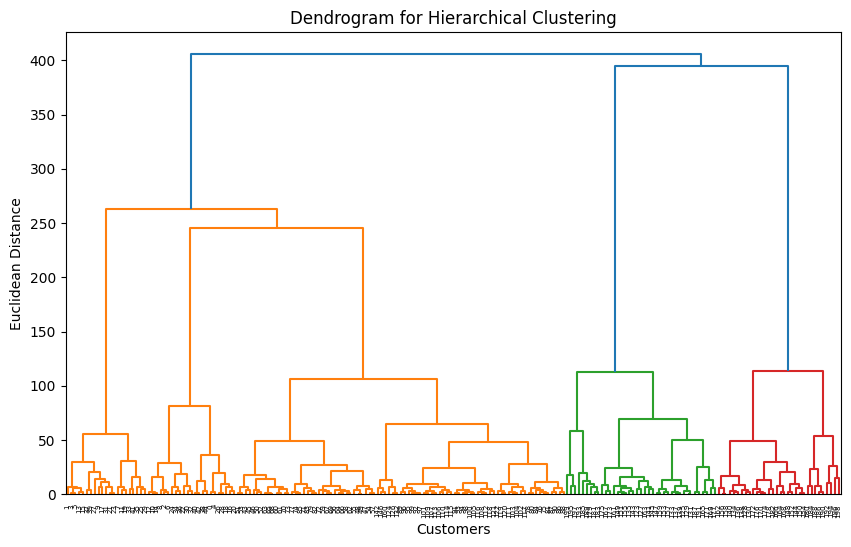

In [16]:
# Creating Dendrogram
plt.figure(figsize=(10,6))
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [17]:
# Applying Agglomerative Clustering with optimal clusters
agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(X)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Agglo_Cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,4,4


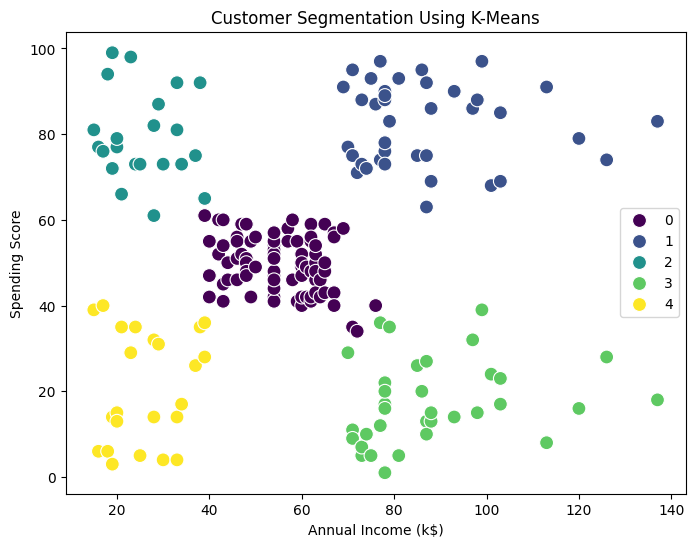

In [18]:
# Visualizing K-Means Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['KMeans_Cluster'], palette='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation Using K-Means')
plt.legend()
plt.show()

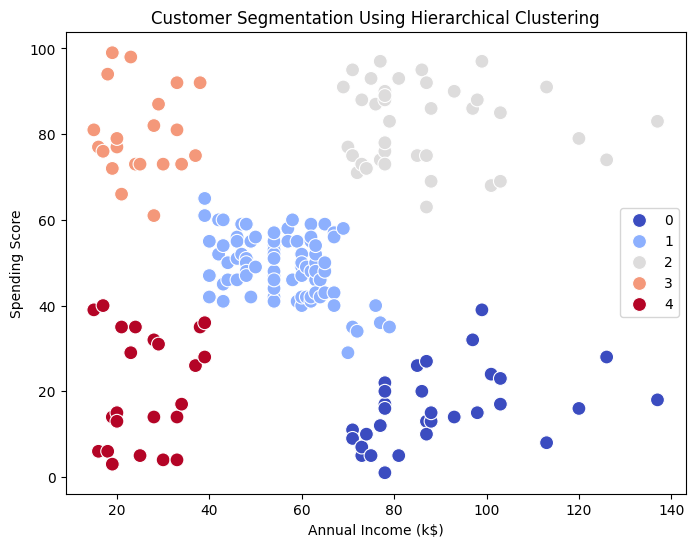

In [19]:
# Visualizing Agglomerative Clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Agglo_Cluster'], palette='coolwarm', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation Using Hierarchical Clustering')
plt.legend()
plt.show()